# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.





In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})


#### a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [72]:
# Matriz de transformação
T = np.array([[ .5,.5],
              [ -1, 1]])

# Aplicando a transformação
# Multiplicação matricial
md = T @ df[['p1', 'p2']].values.T
md = pd.DataFrame(md.T, columns=['mean', 'diff'])


# b) Calcule a correlação entre os dados da **p1** e **p2**

print(df['p1'].corr(df['p2']))

# c) Calcule a correlação entre os dados transformados (média e diferença)

print(md['mean'].corr(md['diff']))

0.8957365818728042
0.1334738541178884


#### b) Calcule a correlação entre os dados da **p1** e **p2**

0.8957365818728042
 
#### c) Calcule a correlação entre os dados transformados (média e diferença)

0.1334738541178884

#### d) Comente as correlações observadas.

a primeira correlação é forte e sugere que alunos com notas maiores na p1 tendem a ter notas maiores na p2.  
enquanto na segunda correlação é fraca e faz sentido, pois se a média é alta, as notas de p1 e p2 provavelmente são próximas.   
Se fossem muito diferentes uma das notas com certeza seria baixa, abaixando a média. Portanto existe uma correlação, mas é fraca.


## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [73]:
# Matriz de transformação
T = np.array([1, 1])

# Aplicando a transformação
sd = df.dot(T)
print("soma")
print(sd.head(5), "\n")
print("media e diferenca")
print(md.head(5), "\n")
print("dados originais")
print(df.head(5), "\n")


soma
0    14.908120
1     7.960930
2     3.242944
3     9.987507
4    16.133092
dtype: float64 

media e diferenca
       mean      diff
0  7.454060  0.978736
1  3.980465  2.238143
2  1.621472 -1.294085
3  4.993754 -1.038788
4  8.066546  1.743712 

dados originais
         p1        p2
0  6.964692  7.943428
1  2.861393  5.099537
2  2.268515  0.974429
3  5.513148  4.474359
4  7.194690  8.938402 



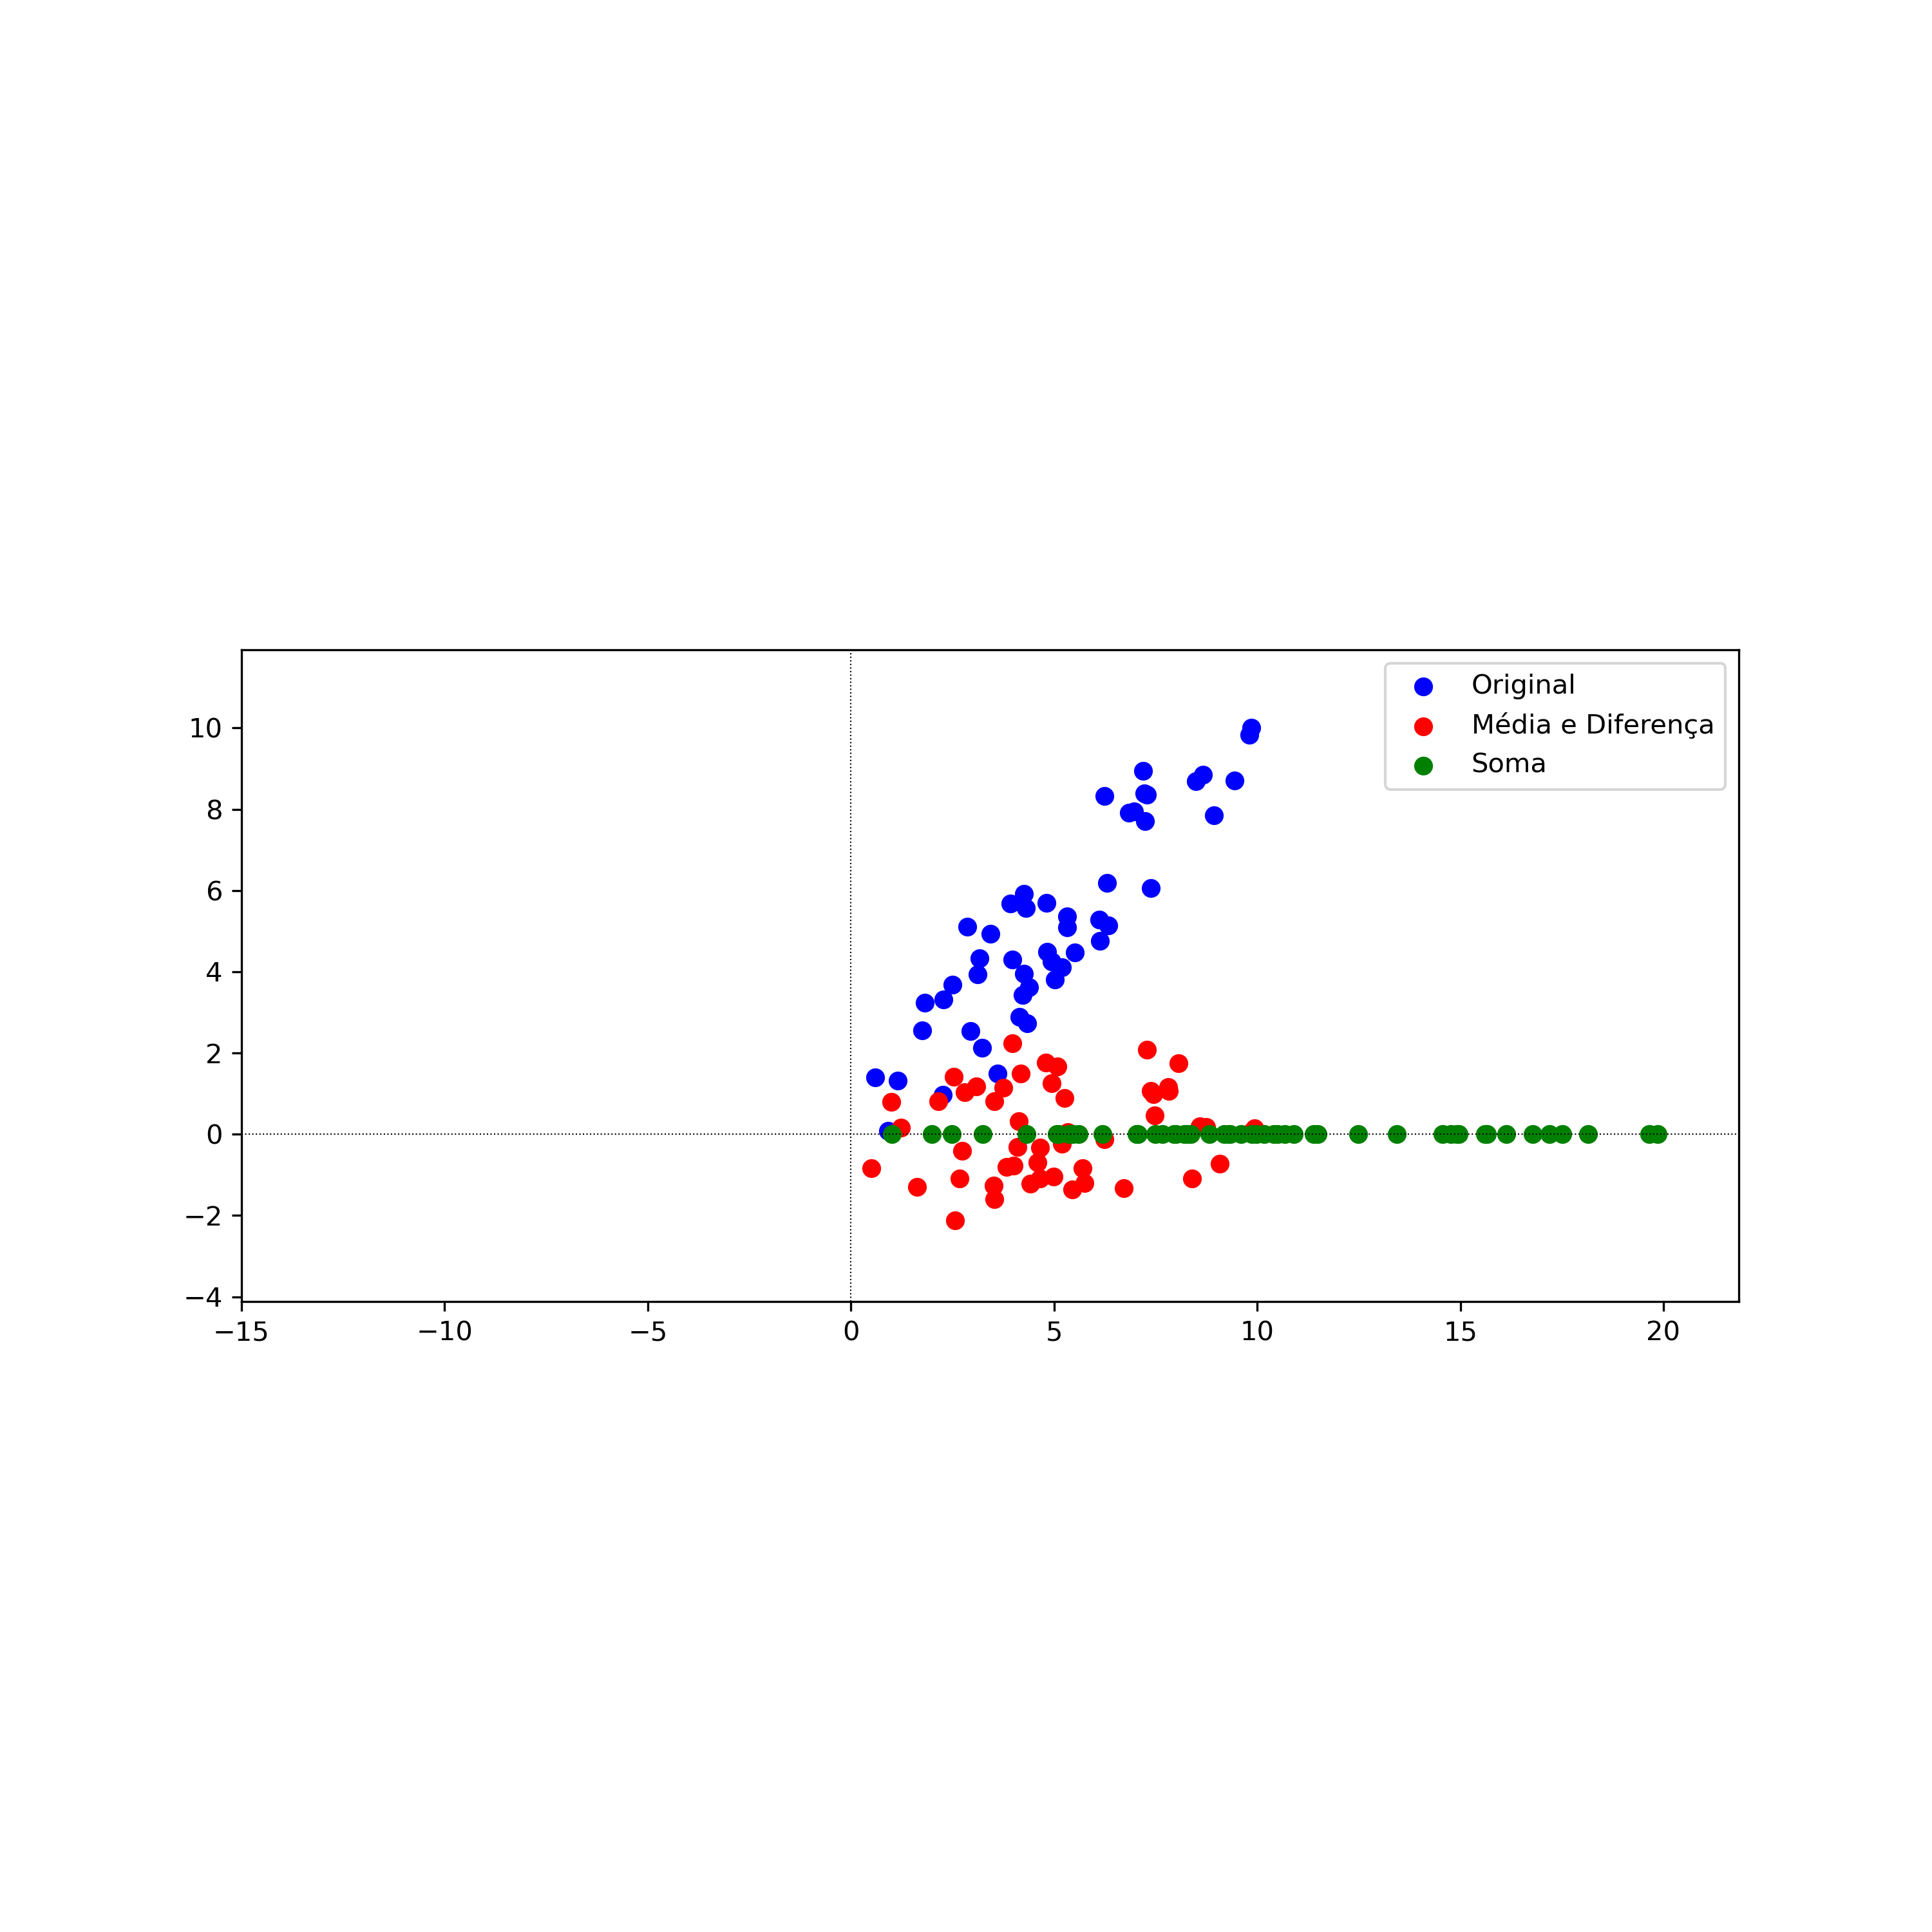

In [84]:
# Construa o gráfico e conclua que diferenças visuais você observa.

fig = plt.figure(figsize=(10,10),dpi=300)  # Reduz o tamanho e aumenta a resolução
ax = fig.add_subplot(1, 1, 1)

# Definindo limites do gráfico
xmax = max(df['p1'].max() , md['mean'].max(), sd.max()) + 2
ymin = min(df['p2'].min(), md['diff'].min()) - 2
ymax = max(df['p1'].max() , md['mean'].max()) + 2
ymin = min(df['p2'].min(), md['diff'].min()) - 2



# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plotando os dados
ax.scatter(df['p1'], df['p2'], color='blue', label='Original')
ax.scatter(md['mean'], md['diff'], color='red', label='Média e Diferença')
ax.scatter(sd, np.zeros_like(sd), color='green', label='Soma')

# adicionando grid pontilhado no eixo x  e y no valor 0
ax.axhline(0, color='black', lw=0.5, ls='dotted')
ax.axvline(0, color='black', lw=0.5, ls='dotted')

# Adicionando legenda
ax.legend()

# Salvando o gráfico em alta resolução
fig.savefig("high_res_plot.png")  # Define DPI alto para salvar com qualidade
plt.close(fig)  # Fecha a figura original para não duplicar no output

# Exibindo a imagem salva em uma célula de notebook
from IPython.display import Image
display(Image(filename="high_res_plot.png", width=600)) 


# Conclusão 
a transformação pelo vetor [1,1] com nosso df, cria um vetor unidimensional, que é a soma das notas de p1 e p2. no gráfico podemos apenas projetar os pontos no eixo x, pois o eixo y é sempre 0.

mas podemos ver claramente que a correlação entre as notas de p1 e p2 é muito mais forte do que a correlação entre a soma e a diferença das notas.

